# Chapter1. 소개
NLP는 언어학 지식에 상관없이 텍스트를 이해하는 통계적인 방법을 사용해 실전 문제를 해결하는 일련의 기술

## 1. 지도 학습

- 머신러닝에서 지도학습은 샘플observation에 대응하는 타깃target(예측하는 값)의 정답을 제공하는 방식

- 문서 분류 작업에서 샘플은 문서이고 타깃은 범주형 레이블 categorical label

- 기계번역에서 샘플은 한 언어의 문장이고 타깃은 다른 언어의 문장

- 샘플 : 예측에 사용되는 아이템. 샘플은 x로 표시. 입력input 이라고도 부른다

- 타깃 : 샘플에 상응하는 레이블label. 일반적으로 예측되는 대상이다. 머신러닝/딥러닝의 표준적인 표기법에 따라 y로 나타낸다. 정답 ground truth 라고도 부른다

- 모델 : 수학식이나 샘플 x를 받아 타깃 레이블값을예측하는 함수

- 파라미터 : 가중치weight 라고도 부른다. 파라미터가 모델을 규정한다. w 또는 w_hat으로 사용

- 예측 : 모델이 추측하는 타깃값. 추정estimate라고도 부른다. hat 표기를 사용 y의 예측은 y_hat

- 손실함수 loss function : 훈련 데이터에 대한 예측이 타깃과 얼마나 멀리 떨어져 있는지 비교하는 함수. 타깃과 예측이 주어지면 손실함수는 손실loss 이라 부르는 실수 스칼라값을 계산. 손실이 낮을수록 타깃 예측을 더 잘하는 모델. L로 표기

### (확률적) 경사 하강법을 사용한 훈련

- 지도학습의 목적은 주어진 데이터셋에서 손실함수를 최소로하는 파라미터값을 고르는것(방정식의 근찾기)

- 경사 하강법gradient descent은 식의 근을 찾는 일반적인 방법

- 전통적인 경사 하강법에서는 근(파라미터)의 추깃값을 추측한 다음 목적 함수objective function(손실함수)의 값이 수용할만한 임계점(수렴조건) 아래로 내려갈때 까지 파라미터를 반복해서 업데이트

- 데이터셋이 크면 적용하기 어렵고 계산 비용이 높아 매우 느리므로 확률적stochastic 경사 하강법을 사용

## 2. 샘플과 타깃의 인코딩

- 샘플(텍스트)을 머신러닝 알고리즘에 사용하려면 수치로 표현

- 수치 벡터는 텍스트를 표현하는 간단한 방법

- 휴리스틱 기반의 단순한 카운트 방식 표현으로 시작. 카운트 기반 표현은 모두 고정된 차원의 벡터로 시작

### 2.1 원-핫 표현 one-hot representation

- 원-핫 표현은 0 벡터에서 시작해 문장이나 문서에 등장하는 단어에 상응하는 원소를 1로 설정

- 문장을 토큰token으로 나누고 구두점을 무시한 다음 모두 소문자로 바꾸면 어휘 사전vocabulary 크기 n차원의 원-핫 벡터로 표현할 수 있다

### 2.2 TF 표현 (Term-Frequency)

- 구, 문장, 문서의 TF 표현은 단순히 소속 단어의 원-핫 표현을 합해 만든다. 각 원소는 해당 단어가 문장(말뭉치)에 등장하는 횟수이다. 단어 w의 TF는 TF(w)라고 표기한다

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


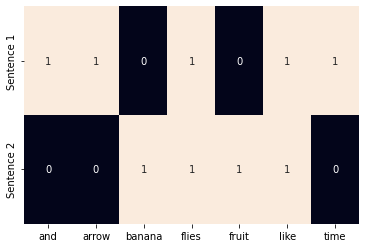

In [ ]:
# 사이킷런을 사용하여 원-핫 벡터 또는 이진 표현 만들기
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies like and arrow.',
          'Fruit flies like a banana']

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names()

sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=vocab,
            yticklabels=['Sentence 1', 'Sentence 2'])

### 2.3 TF-IDF 표현 (Term-Frequency-Inverse-Document-Frequency)

- 특허 문서 묶음이 있다고 가정할 때, 문서 대부분에 'claim', 'system', 'method', 'procedure' 같은 단어가 여러번 반복해서 나올 것이라고 예상할 수 있다

- TF는 등장 횟수에 비례하여 단어에 가중치를 부여한다. 하지만 'claim' 같이 흔한 단어에는 특정 특허와 관련된 정보는 담겨있지않고 반대로 희귀한 단어는 자주 나오지 않지만 특허 문서긔 특징을 잘 나타낸다

- 역문서빈도(IDF)는 벡터 표현에서 흔한 토큰의 점수를 낮추고 드문 토큰의 점수를 높인다


- $IDF\left(w\right)=\log \frac{N}{n_w}\ \ \ \ \left(n_w\ :\ 단어\ w를\ 포함한\ 문서의\ 개수,\ N\ :\ 전체\ 문서\ 개수\right)$

- TF-IDF score : TF(w) * IDF(w)

- 사이킷런의 TfidfVectorizer 클래스에서 계산하는 IDF는 분자와 분모에 1을 더하고 마지막에 1을 더해 모든 문서에 포함된 단어가 있을 때 IDF가 0이 되는 상황을 방지한다

- 딥러닝의 목적은 표현 학습이므로 보통 TF-IDF와 같이 경험적인 방법으로 입력을 인코딩하지 않는다

- 주로 정수 인덱스를 사용한 원-핫 인코딩과 특수한 임베딩 룩업embedding lookup 층으로 신경망을 구성

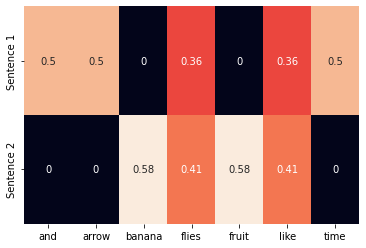

In [ ]:
# 사이킷런을 사용해 TF-IDF 표현 만들기
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels=['Sentence 1', 'Sentence 2'])

### 2.4 타깃 인코딩

- 타깃변수의 정확한 형태는 풀려는 NLP 문제에 따라 다르다

- 많은 NLP 작업은 범주형 레이블 사용. 레이블마다 고유한 인덱스를 부여하는 방법을 가장 많이 사용

- 이런 간단한 표현은 출력 레이블 수가 너무 커지면 문제가 된되는데, 이전 단어를 입력하면 다음 단어를 예측하는 language modeling이 그런 예이다

- '0-18', '19-25', '25-30' 과 같은 범주형 구간bin 으로 바꾸고 순서가 있는 분류문제로 다루는 방법도 있다

## 3. 계산 그래프

- 계산 그래프 데이터 구조를 사용하면 데이터 흐름을 간편하게 구현 가능하다

- 기술적으로 보면 계산 그래프는 수학식을 추상적으로 모델링 한것이다

- 노드node는 곱셈이나 덧셈같은 수학 연산을 나타낸다

- 연산의 입력은 노드로 들어가는 에지edge이고 연산의 출력은 노드에서 나가는 에지이다

## 4. 파이토치 기초

- 씨아노, 카페, 텐서플로와 달리 파이토치는 테이프tape 기반 자동미분 방식을 구현 (http://bit.ly/2Jrntq1)

- 이 방식은 계산 그래프를 동적으로 정의하고 실행할 수 있다

- 디버깅이 아주 편리하며 복잡한 모델을 손쉽게 만들게 해준다


(참고)동적 계산 그래프와 정적 계산 그래프

- 씨아노, 카페, 텐서플로와 같은 정적 프레임워크는 먼저 계산 그래프를 정의하고 컴파일한 다음 실행

- 이 방식은 제품시스템과 모바일 환경에서 매우 효율적이지만 연구나 개발을 할땐 번거로울 수 있다

- 체이너, 다이넷, 파이토치 같은 최신 프레임워크는 동적 계산 그래프를 구현하여 좀 더 유연한 명령형 스타일의 개발을 지원하며 실행할 때마다 모델을 컴파일하지 않아도 된다

- 입력마다 다른 그래프 구조가 만들어질 수 잇는 NLP 모델링 작업에 잘 맞는다

- 파이토치는 다양한 딥러닝용 패키지를 제공하는 최적화된 텐서 조작 라이브러리

### 4.1 파이토치 설치
- https://pytorch.org/ 참고하여 컴퓨터 환경에 맞도록 설치

### 4.2 텐서 만들기

In [3]:
# 헬퍼 함수 정의
def describe(x):
    print("type  : {}".format(x.type()))
    print("shape : {}".format(x.shape))
    print("value : \n{}".format(x))

In [4]:
# Create Tensor
import torch
describe(torch.Tensor(2, 3))

type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
# random init Tensor
import torch
describe(torch.rand(2, 3))  # 균등분포
describe(torch.randn(2, 3)) # 표준정규분포

type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[0.9234, 0.8137, 0.6873],
        [0.4243, 0.1883, 0.9403]])
type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[ 0.1363, -0.0169,  1.4050],
        [ 1.2756, -0.3973,  1.2365]])


In [6]:
# filled() method
import torch
describe(torch.zeros(2, 3))
x = torch.ones(2, 3)
describe(x)
x.fill_(5)
describe(x)

type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [7]:
# list
x = torch.Tensor([[1,2,3],
                  [4,5,6]])
describe(x)

type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [8]:
# numpy로 텐서 만들고 초기화
import torch
import numpy as np
npy = np.random.rand(2,3)
describe(torch.from_numpy(npy))

type  : torch.DoubleTensor
shape : torch.Size([2, 3])
value : 
tensor([[0.0118, 0.2332, 0.7599],
        [0.4738, 0.9339, 0.4382]], dtype=torch.float64)


### 4.3 텐서 타입과 크기

- torch.Tensor 생성자를 사용할 때 기본 텐서 타입은 torch.FloatTensor

- 타입은 초기화할 때 지정하거나 나중에 타입 캐스팅casting 메서드 사용해 변경(float, long, double 등)

In [9]:
# 텐서 속성
x - torch.FloatTensor([[1,2,3],
                      [4,5,6]])
describe(x)

type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [10]:
x = x.long()
describe(x)

type  : torch.LongTensor
shape : torch.Size([2, 3])
value : 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [11]:
x = torch.tensor([[1,2,3],
                  [4,5,6]], dtype=torch.int64)
describe(x)

type  : torch.LongTensor
shape : torch.Size([2, 3])
value : 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [12]:
x = x.float()
describe(x)

type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


### 4.4 텐서 연산

In [13]:
import torch
x = torch.randn(2, 3)
describe(x)

type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[-1.3404,  0.9345,  0.8101],
        [-0.2542, -0.9078,  1.5112]])


In [14]:
describe(torch.add(x, x))

type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[-2.6809,  1.8691,  1.6202],
        [-0.5083, -1.8157,  3.0225]])


In [15]:
describe(x+x)

type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[-2.6809,  1.8691,  1.6202],
        [-0.5083, -1.8157,  3.0225]])


In [16]:
# 차원별 텐서 연산
import torch
x = torch.arange(6)
describe(x)

type  : torch.LongTensor
shape : torch.Size([6])
value : 
tensor([0, 1, 2, 3, 4, 5])


In [17]:
x = x.view(2,3)
describe(x)

type  : torch.LongTensor
shape : torch.Size([2, 3])
value : 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [18]:
describe(torch.sum(x, dim=0))

type  : torch.LongTensor
shape : torch.Size([3])
value : 
tensor([3, 5, 7])


In [19]:
describe(torch.sum(x, dim=1))

type  : torch.LongTensor
shape : torch.Size([2])
value : 
tensor([ 3, 12])


In [20]:
# transpose() 함수는 두번째와 세번째로 전달된 차원을 전치한 텐서
describe(torch.transpose(x, 0, 1))

type  : torch.LongTensor
shape : torch.Size([3, 2])
value : 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


### 4.5 인덱싱, 슬라이싱, 연결

In [21]:
import torch
x = torch.arange(6).view(2,3)
describe(x)

type  : torch.LongTensor
shape : torch.Size([2, 3])
value : 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [22]:
describe(x[:1, :2])

type  : torch.LongTensor
shape : torch.Size([1, 2])
value : 
tensor([[0, 1]])


In [23]:
describe(x[0,1])

type  : torch.LongTensor
shape : torch.Size([])
value : 
1


In [24]:
# 복잡한 인덱싱, 연속적지 않은 인덱스 참조
indices = torch.LongTensor([0,2])
describe(torch.index_select(x, dim=1, index=indices))

type  : torch.LongTensor
shape : torch.Size([2, 2])
value : 
tensor([[0, 2],
        [3, 5]])


In [25]:
indices = torch.LongTensor([0,0])
describe(torch.index_select(x, dim=0, index=indices))

type  : torch.LongTensor
shape : torch.Size([2, 3])
value : 
tensor([[0, 1, 2],
        [0, 1, 2]])


In [26]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0,1])
describe(x[row_indices, col_indices])

type  : torch.LongTensor
shape : torch.Size([2])
value : 
tensor([0, 4])


In [27]:
# 텐서 연결
import torch
x = torch.arange(6).view(2,3)
describe(x)

type  : torch.LongTensor
shape : torch.Size([2, 3])
value : 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [28]:
describe(torch.cat([x,x], dim=0))

type  : torch.LongTensor
shape : torch.Size([4, 3])
value : 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [29]:
describe(torch.cat([x,x], dim=1))

type  : torch.LongTensor
shape : torch.Size([2, 6])
value : 
tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [30]:
describe(torch.stack([x,x]))

type  : torch.LongTensor
shape : torch.Size([2, 2, 3])
value : 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


In [31]:
# 텐서의 선형 대수 계산 : 행렬 곱셈
import torch
x1 = torch.arange(6).view(2,3).float()
describe(x1)

type  : torch.FloatTensor
shape : torch.Size([2, 3])
value : 
tensor([[0., 1., 2.],
        [3., 4., 5.]])


In [32]:
x2 = torch.ones(3,2)
x2[:, 1] += 1
describe(x2)

type  : torch.FloatTensor
shape : torch.Size([3, 2])
value : 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [33]:
describe(torch.mm(x1, x2))

type  : torch.FloatTensor
shape : torch.Size([2, 2])
value : 
tensor([[ 3.,  6.],
        [12., 24.]])


### 4.6 텐서와 계산 그래프

- tensor 클래스는 데이터와 대수 연산, 인덱싱, 크기 변경 같은 다양한 연산을 캡슐화

- 텐서의 requires_grad=True 지정시 손실함수와 텐서의 그레이디언트를 기록하는 부가 연산 활성화

- 파이토치가 정방향 계산의 값을 기록하고 계산이 끝나면 스칼라값 하나를 사용해 역방향 계산을 수행

- 역방향 계산은 손실 함수의 평가 결과로 얻은 텐서에서 backward() 메서드를 호출해 시작

- 역방향 계산은 정방향 계산에 참여한 텐서 객체에 대한 그레이디언트값을 계산

In [34]:
# 그레이디언트 연산을 할 수 있는 텐서 만들기
import torch
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

type  : torch.FloatTensor
shape : torch.Size([2, 2])
value : 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [35]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

type  : torch.FloatTensor
shape : torch.Size([2, 2])
value : 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [36]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

type  : torch.FloatTensor
shape : torch.Size([])
value : 
21.0
False


### 4.7 CUDA 텐서

- GPU를 사용하려면 먼저 텐서를 GPU 메모리에 할당. CUDA API를 사용해 GPU 활용

- CUDA API는 NVIDIA에서 만들었고 NVIDIA GPU에서만 사용

- 파이토치는 내부적인 할당 방식만 다를 뿐 CPU 텐서와 사용법이 같은 CUDA 텐서 객체 제공

- 파이토치에서는 CPU나 GPU 같은 장치에 상관없이 동작하는 코드를 작성하는 것이 바람직

In [37]:
# CUDA 텐서 만들기
import torch
print(torch.cuda.is_available())

True


In [38]:
# 바람직한 방법 : 장치에 무관한 텐서 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [39]:
x = torch.rand(3,3).to(device)
describe(x)

type  : torch.cuda.FloatTensor
shape : torch.Size([3, 3])
value : 
tensor([[0.7342, 0.3750, 0.7422],
        [0.0931, 0.9322, 0.3491],
        [0.3825, 0.1605, 0.8615]], device='cuda:0')


In [40]:
# CUDA 텐서와 CPU 텐서 더하기
y = torch.rand(3,3)
x + y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [ ]:
cpu_device = torch.device("cpu")
y = y.to(cpu_device)
x = x.to(cpu_device)
x + y

tensor([[1.0964, 1.2259, 0.8231],
        [1.3676, 0.1332, 0.5061],
        [0.9303, 1.8388, 0.9000]])

- GPU로 데이터를 넣고 꺼내는 작업은 비용이 많이든다

- 따라서 병렬 계산은 일반적으로 GPU에서 수행하고 최종 결과만 CPU로 전송하는 방식으로 이루어 진다

- CUDA 장치가 여럿이라면 프로그램을 실행할 때 다음처럼 CUDA_VISIBLE_DEVICES 환경변수 사용

    - CUDA_VISIBLE_DEVICES=0,1,2,3 python main.py

    - http://bit.ly/2PqdsPF

## 5. 연습문제
- 공식문서 참고 : http://bit.ly/3c7Bfyq

In [41]:
# 1. 2D 텐서를 만들고 차원 0 위치에 크기가 1인 차원을 추가
a = torch.rand(3,3)

a.unsqueeze(0)

tensor([[[0.3868, 0.7568, 0.5310],
         [0.4729, 0.0128, 0.1200],
         [0.1898, 0.3947, 0.7924]]])

In [42]:
# 2. 이전 텐서에 추가한 차원을 삭제
a.squeeze(0)

tensor([[0.3868, 0.7568, 0.5310],
        [0.4729, 0.0128, 0.1200],
        [0.1898, 0.3947, 0.7924]])

In [43]:
# 3. 범위가 [3,7) 이고 크기가 5x3인 랜덤한 텐서
3 + torch.rand(5,3) * (7-3)

tensor([[6.8157, 4.0807, 4.3888],
        [5.1820, 6.5484, 4.4226],
        [3.4679, 6.4684, 3.4884],
        [4.8010, 4.7209, 4.9162],
        [6.5226, 3.5379, 5.3957]])

In [44]:
# 4. 정규 분포를 사용해 텐서
a = torch.rand(3,3)
a.normal_()

tensor([[-1.2995,  0.8005, -0.6133],
        [ 0.9576, -1.1282,  0.7441],
        [ 1.0416,  0.5043, -0.5898]])

In [45]:
# 5. 텐서 torch.Tensor([1,1,1,0,1])에서 0이 아닌 원소의 인덱스를 추출
a = torch.Tensor([1,1,1,0,1])
torch.nonzero(a)

tensor([[0],
        [1],
        [2],
        [4]])

In [46]:
# 6. 크기가 (3,1)인 랜덤한 텐서를 만들고 네 벌을 복사해 쌓기
a = torch.rand(3, 1)
a.expand(3, 4)

tensor([[0.5250, 0.5250, 0.5250, 0.5250],
        [0.3551, 0.3551, 0.3551, 0.3551],
        [0.6749, 0.6749, 0.6749, 0.6749]])

In [47]:
# 7. 2차원 행렬 두 개(a=torch.rand(3,4,5), b=torch.rand(3,5,4))의 배치 행렬 곱셈 계산
a = torch.rand(3,4,5)
b = torch.rand(3,5,4)
torch.bmm(a, b)

tensor([[[1.6799, 2.1704, 1.1329, 1.9046],
         [0.9733, 1.3021, 0.5777, 1.0161],
         [1.4919, 1.3196, 0.9003, 1.1017],
         [1.9760, 2.4991, 1.3687, 2.0681]],

        [[0.8891, 1.4437, 0.7750, 0.6108],
         [0.5798, 2.2810, 1.1174, 1.2722],
         [0.7250, 1.5154, 0.5268, 0.7243],
         [0.4922, 1.5086, 0.5597, 0.6511]],

        [[0.9404, 0.8557, 0.4529, 0.4099],
         [0.8847, 1.3853, 1.3583, 1.4064],
         [1.5172, 0.9548, 1.0138, 0.8809],
         [0.9457, 0.9718, 0.9701, 0.8813]]])

In [48]:
# 8. 3차원 행렬(a=torch.rand(3,4,5))과 2차원 행렬(b=torch.rand(5,4))의 배치 행렬 곱셈 계산
a = torch.rand(3,4,5)
b = torch.rand(5,4)
torch.bmm(a,b.unsqueeze(0).expand(a.size(0), *b.size()))

tensor([[[1.5522, 1.0200, 1.3349, 1.7985],
         [1.1660, 1.0891, 1.5489, 1.1330],
         [1.1317, 0.5333, 0.9101, 0.7200],
         [1.8489, 1.5430, 1.9988, 2.0788]],

        [[0.9337, 0.6871, 1.0537, 0.6474],
         [0.8938, 1.0313, 1.5143, 1.1434],
         [1.7527, 1.0622, 1.3049, 1.9548],
         [0.8296, 0.8663, 0.7990, 1.4746]],

        [[1.1785, 1.0682, 1.6469, 1.2195],
         [0.5642, 0.5490, 0.5350, 0.9589],
         [1.3178, 1.3335, 1.3356, 1.8476],
         [0.7765, 0.9049, 1.0745, 1.1199]]])